
# Trapezoidal method based on mean and standard deviation

##  import bibliotek

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

warnings.filterwarnings("ignore")

from src.vertical_logs_analyzer import VerticalLogsAnalyzer
from src.relation_matrix import AllenRelationsFinderNaiveMethod
from src.data_preparation import prepare_logs
import time

### Załadowanie pliku formatu .xes

In [2]:
log = xes_importer.apply('logs/exercise6.xes')

parsing log, completed traces ::   0%|          | 0/132 [00:00<?, ?it/s]

### Przetworzenie logów do pd.Dataframe

In [3]:
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

### Podgląd logow znajdujących się w załadowanym pliku

In [4]:
df.head()

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,Call Centre Agent,2005-12-31 23:00:00+00:00,check if sufficient information is available,start,0
1,Call Centre Agent,2006-01-13 23:00:00+00:00,check if sufficient information is available,complete,0
2,Call Centre Agent,2006-01-13 23:00:00+00:00,register claim,start,0
3,Call Centre Agent,2008-01-29 23:00:00+00:00,register claim,complete,0
4,Claims handler,2008-01-29 23:00:00+00:00,determine likelihood of claim,start,0


In [5]:
print(df.groupby(['lifecycle:transition'])['lifecycle:transition'].count())

lifecycle:transition
complete    821
start       821
Name: lifecycle:transition, dtype: int64


### Zamiana logów na format zawierający star_timestamp oraz complete_timestamp

In [6]:
df = prepare_logs(df=df, status='lifecycle:transition', timestamp='time:timestamp',status_cols=df['lifecycle:transition'].unique())
df.head()

,org:resource,concept:name,case:concept:name,start_timestamp,complete_timestamp
0,Call Centre Agent,check if sufficient information is available,0,2005-12-31 23:00:00+00:00,2006-01-13 23:00:00+00:00
1,Call Centre Agent,check if sufficient information is available,1,2005-12-31 23:00:00+00:00,2006-03-07 23:00:00+00:00
2,Call Centre Agent,check if sufficient information is available,10,2006-03-30 23:00:00+00:00,2006-04-09 23:00:00+00:00
3,Call Centre Agent,check if sufficient information is available,100,2008-07-26 23:00:00+00:00,2008-09-16 23:00:00+00:00
4,Call Centre Agent,check if sufficient information is available,101,2007-11-13 23:00:00+00:00,2008-01-19 23:00:00+00:00


In [7]:
Vexercise6 = VerticalLogsAnalyzer(logs=df,
                                  case_id_column_name='case:concept:name', 
                                  task_column_name='concept:name', 
                                  instance_column_name='org:resource',
                                  start_timestamp_column_name='start_timestamp', 
                                  complete_timestamp_column_name='complete_timestamp')


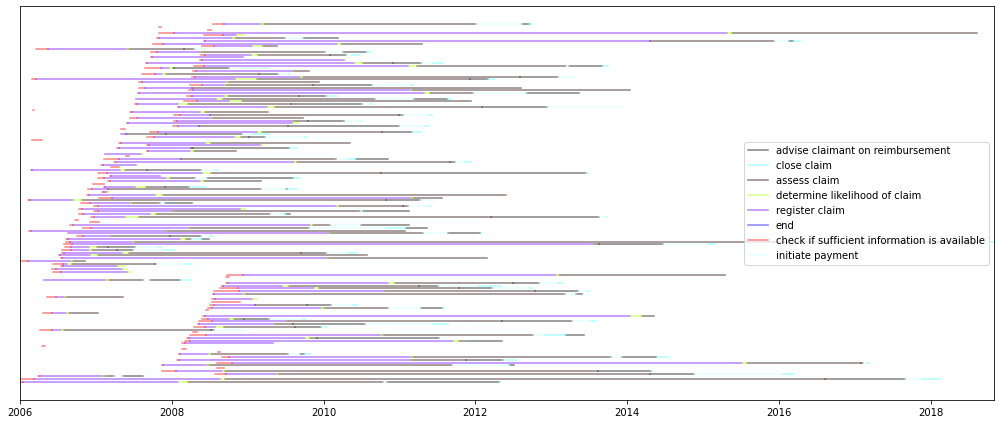

In [8]:
Vexercise6.plot_all_tasks()

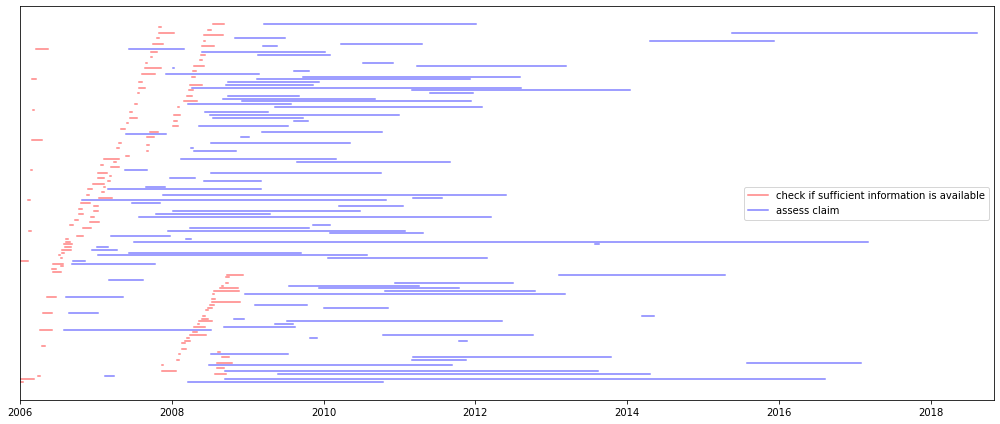

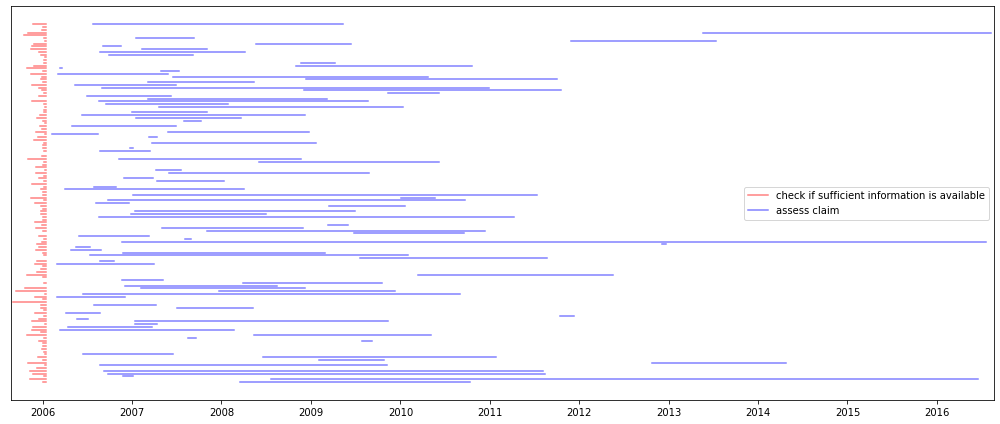

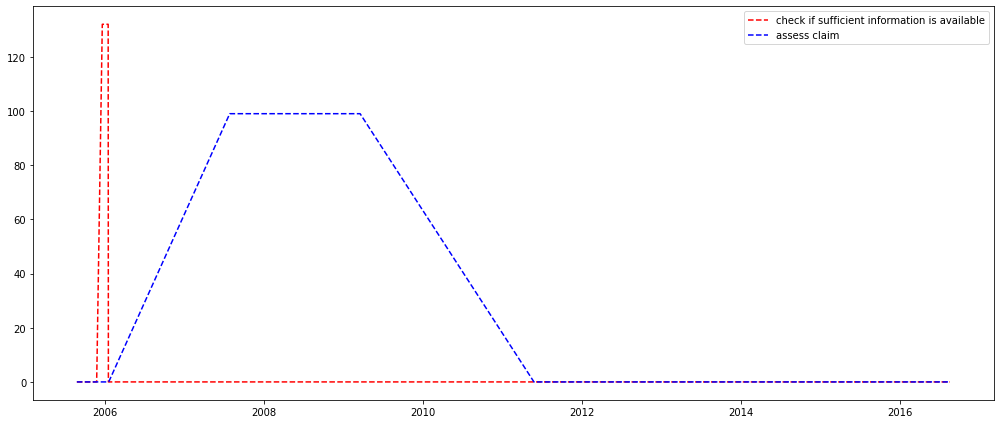

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
check if sufficient information is available area: 5360.1 
assess claim area: 126479.58 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 



['meets', 'before']

In [9]:
Vexercise6.core_trapezoid_method(first_task=Vexercise6.list_of_tasks[0],
                                 second_task=Vexercise6.list_of_tasks[4],
#                                  instance='Call Centre Agent',
                                 plot_results=True,
                                 plot_steps=True,
                                 print_results=True)

In [10]:
tasks = ['determine likelihood of claim', 'assess claim', 'advise claimant on reimbursement', 'initiate payment', 'close claim']
for i in range(len(tasks)):
    for j in range(i + 1, len(tasks)):
        print('possible trapezoid relations: ', 
              Vexercise6.core_trapezoid_method(first_task=tasks[j],
                                               second_task=tasks[i],
#                                                instance='Claims handler',
#                                                plot_results=True,
#                                                plot_steps=True,
                                               print_results=True))
        print('possible polynomial relations: ', 
              Vexercise6.core_polynomial_method(first_task=tasks[j],
                                               second_task=tasks[i],
#                                                instance='Claims handler',
#                                                plot_results=True,
#                                                plot_steps=True,
                                               print_results=True))
        print('\n\n')

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 3281.0 
assess claim area: 88574.37 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible trapezoid relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 3875817222.55 
assess claim area: 199114038.34 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible polynomial relations:  ['meets', 'before']



= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 3281.0 
advise claimant on reimbursement area: 63240.76 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible trapezoid relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 1367173798.24 
advise claima

### Analiza zbioru reviewing.csv

In [11]:
df_reviewing = pd.read_csv('logs/reviewing.csv')
df_reviewing['start_timestamp'] = pd.to_datetime(df_reviewing['Start Timestamp'])
df_reviewing['complete_timestamp'] = pd.to_datetime(df_reviewing['Complete Timestamp'])
df_reviewing.head()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,(case) description,Result by Reviewer A,Result by Reviewer B,Result by Reviewer C,Result by Reviewer X,accepts,lifecycle:transition,rejects,start_timestamp,complete_timestamp
0,1,invite reviewers,Mike,2006-01-01 00:00:00.000,2006-01-06 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,NaN,NaN,NaN,complete,NaN,2006-01-01,2006-01-06
1,1,get review 2,Carol,2006-01-09 00:00:00.000,2006-01-09 00:00:00.000,Variant 5,5,Simulated process instance,NaN,reject,NaN,NaN,NaN,complete,NaN,2006-01-09,2006-01-09
2,1,get review 3,Pam,2006-01-10 00:00:00.000,2006-01-10 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,reject,NaN,NaN,complete,NaN,2006-01-10,2006-01-10
3,1,get review 1,John,2006-01-11 00:00:00.000,2006-01-11 00:00:00.000,Variant 5,5,Simulated process instance,reject,NaN,NaN,NaN,NaN,complete,NaN,2006-01-11,2006-01-11
4,1,collect reviews,Anne,2006-01-11 00:00:00.000,2006-01-13 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,NaN,NaN,NaN,complete,NaN,2006-01-11,2006-01-13


In [12]:
Vreviewing = VerticalLogsAnalyzer(logs=df_reviewing,
                             case_id_column_name='Case ID', 
                             task_column_name='Activity', 
                             instance_column_name='Variant')

In [13]:
Vreviewing.list_of_tasks

array(['invite reviewers', 'get review 2', 'get review 3', 'get review 1',
       'collect reviews', 'decide', 'invite additional reviewer',
       'get review X', 'reject', 'time-out 1', 'time-out X', 'accept',
       'time-out 2', 'time-out 3'], dtype=object)

In [14]:
tasks = [task for task in df_reviewing[df_reviewing['Variant'] == 'Variant 5']['Activity'].unique() if task not in ['get review 2', 'get review 3','get review 1']]

for i in range(len(tasks)):
    for j in range(i + 1, len(tasks)):
        print('possible trapezoid relations: ', 
              Vreviewing.core_trapezoid_method(first_task=tasks[i],
                                               second_task=tasks[j],
#                                                instance='Claims handler',
#                                                plot_results=True,
#                                                plot_steps=True,
#                                                print_results=True,
                                               is_big_dataframe=True))
        print('possible polynomial relations: ', 
              Vreviewing.core_polynomial_method(first_task=tasks[i],
                                               second_task=tasks[j],
#                                                instance='Claims handler',
#                                                plot_results=True,
#                                                plot_steps=True,
                                               print_results=True))
        print('\n\n')

possible trapezoid relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 22390921.04 
collect reviews area: 28413093.94 
splot area: -64567.7 

splot/task1: 0 % 
splot/task2: 0 % 

possible polynomial relations:  ['meets', 'starts', 'before', 'overlaps', 'contains', 'equals']



possible trapezoid relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 22390921.04 
decide area: 204067952.31 
splot area: -4353791.78 

splot/task1: -19 % 
splot/task2: -2 % 

possible polynomial relations:  ['meets', 'starts', 'before', 'overlaps', 'contains', 'equals']



possible trapezoid relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 22390921.04 
invite additional reviewer area: 126332054.73 
splot area: -209539.1 

splot/tas